Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [730]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import importlib
importlib.reload(site)

[[np.int64(0), np.int64(11)], [np.int64(2), np.int64(13)], [np.int64(4), np.int64(15)], [np.int64(6), np.int64(17)], [np.int64(10), np.int64(22)], [np.int64(12), np.int64(24)], [np.int64(14), np.int64(26)], [np.int64(16), np.int64(28)], [np.int64(19), np.int64(31)], [np.int64(21), np.int64(33)], [np.int64(23), np.int64(35)], [np.int64(25), np.int64(37)], [np.int64(30), np.int64(41)], [np.int64(32), np.int64(43)], [np.int64(34), np.int64(45)], [np.int64(36), np.int64(47)]]


<module 'Class_site' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/Class_site.py'>

In [731]:
Npx = 3 # Number of plaquette in each dimension
Npy = 3
model = site.SitesPBC(Npx, Npy)

In [732]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print("Nxsites ", model.Nxsites)
print("Nyrows ", model.Nyrows)
print(model.partition)
print(model.partition[0])

Number of sites: 24
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Nxsites  6
Nyrows  4
['A' 'B' 'A' 'B' 'A' 'B' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B'
 'B' 'A' 'B' 'A' 'B' 'A']
A


In [733]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]]


In [734]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
(5, 0)


In [735]:
9 % 2

1

In [736]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bond = model.get_diagonalbonds()
anyon_bonds, px, py = model.get_anyonbonds()

In [737]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bond: ", np.array(diagonal_bond))
print("anyon_bonds: ", np.array(anyon_bonds))

xx_bond:  [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 7  8]
 [ 9 10]
 [11  6]
 [12 13]
 [14 15]
 [16 17]
 [19 20]
 [21 22]
 [23 18]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 0  5]
 [ 7  6]
 [ 9  8]
 [11 10]
 [14 13]
 [16 15]
 [12 17]
 [19 18]
 [21 20]
 [23 22]]
zz_bond:  [[ 0  6]
 [ 2  8]
 [ 4 10]
 [ 7 13]
 [ 9 15]
 [11 17]
 [12 18]
 [14 20]
 [16 22]]
diagonal_bond:  [[ 0  8]
 [ 2 10]
 [ 4  6]
 [ 7 15]
 [ 9 17]
 [11 13]
 [12 20]
 [14 22]
 [16 18]]
anyon_bonds:  [[16 17]]


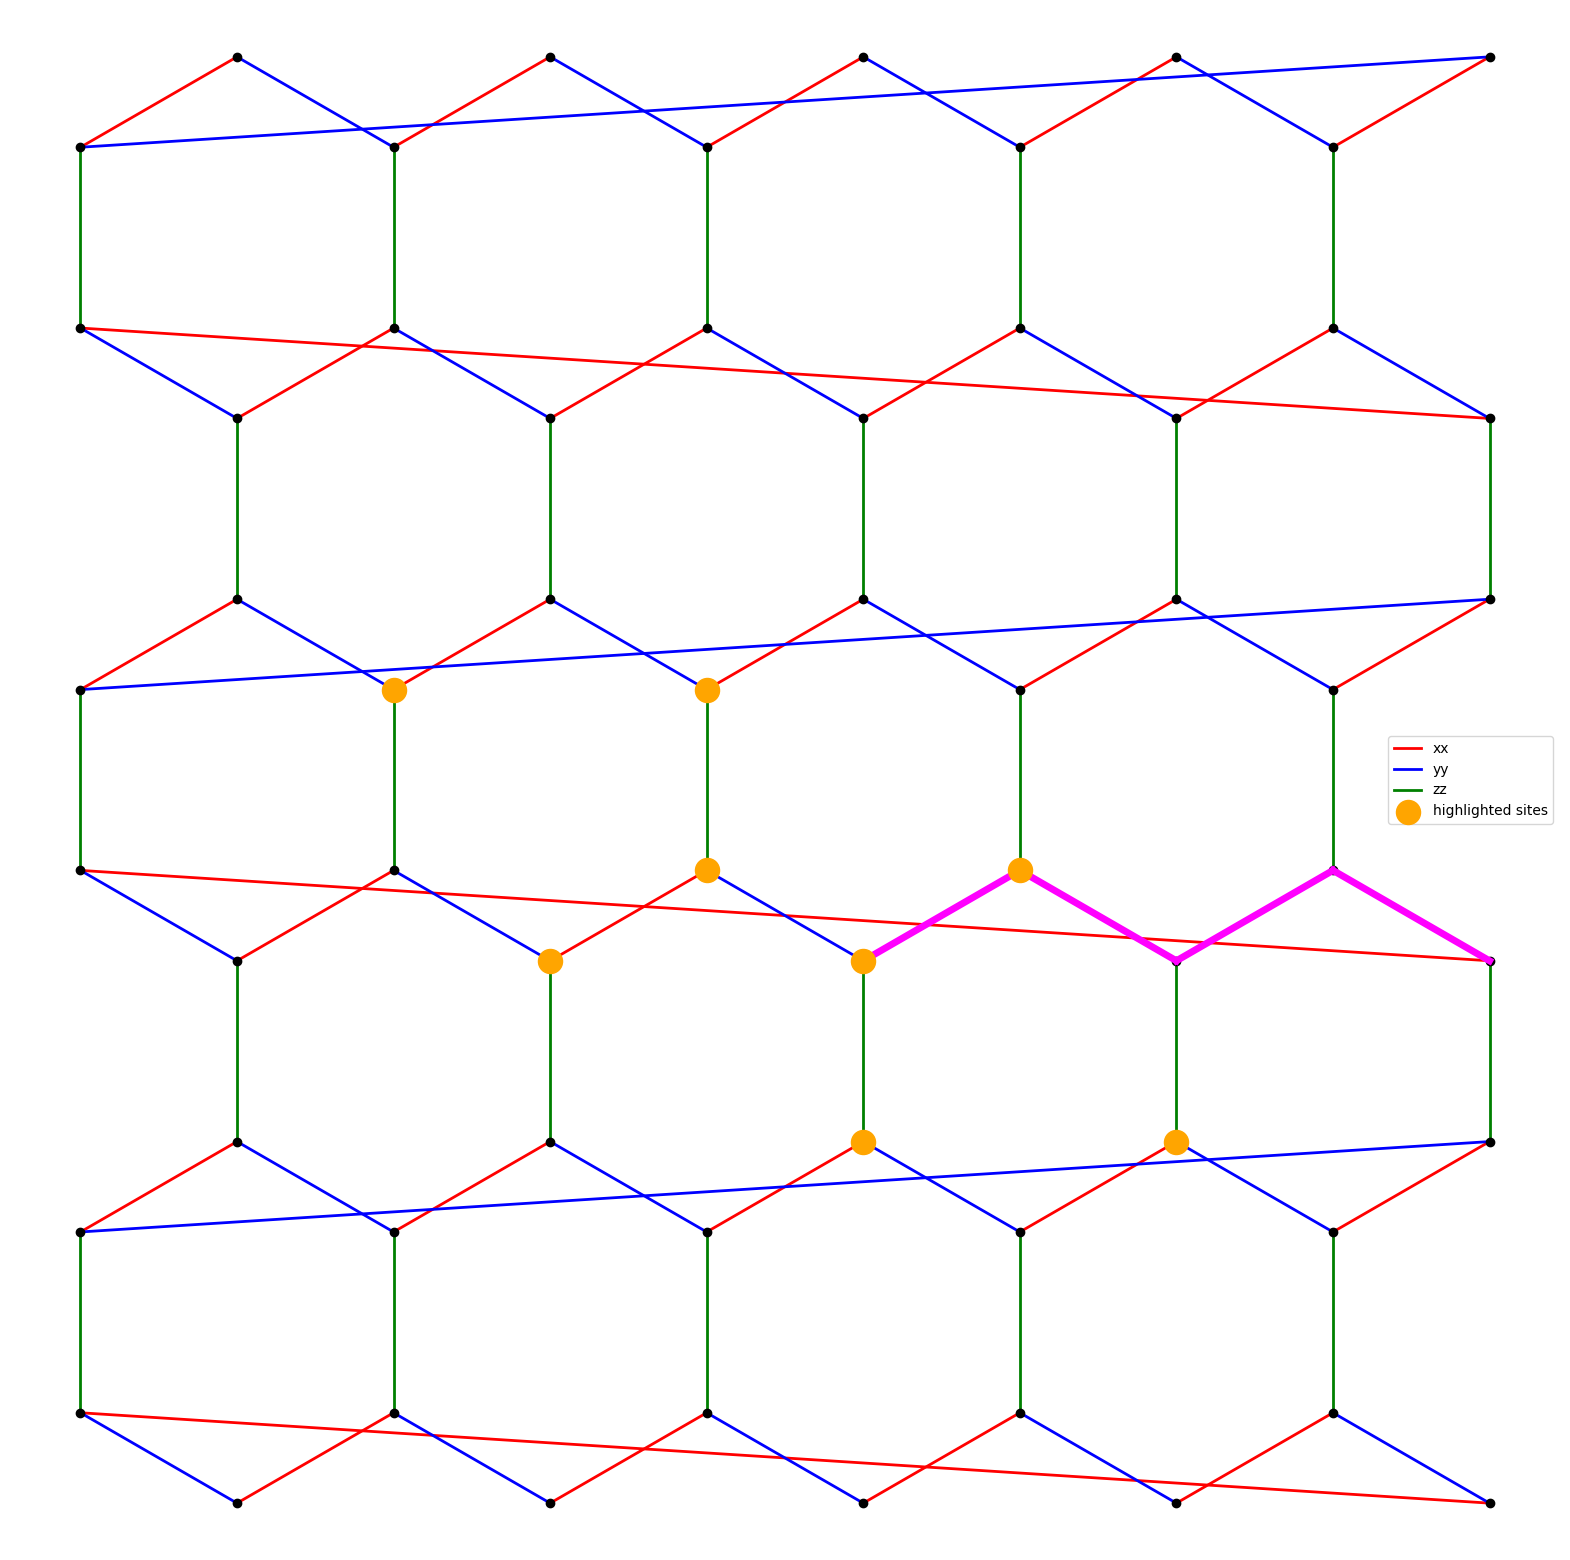

anyon bonds:  ([[np.int64(35), np.int64(36)], [np.int64(36), np.int64(37)], [np.int64(37), np.int64(38)], [np.int64(38), np.int64(39)]], np.int64(5), np.int64(3))


In [738]:
modell = site.SitesPBC(Npx = 5, Npy = 5)
indices = [22,24,33,34,35,36,45,47]
site.plot_honeycomb(modell, plot_anyon_bonds= True, plot_diagonal_bonds = False, indices = indices)
print("anyon bonds: ", modell.get_anyonbonds())

In [739]:
print(modell.id_to_idxidy(35))
print(modell.idxidy_to_id(5,4))

(5, 3)
45


In [740]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

Coordinates of sites:  [[ 0.         -0.        ]
 [ 0.8660254   0.5       ]
 [ 1.73205081 -0.        ]
 [ 2.59807621  0.5       ]
 [ 3.46410162 -0.        ]
 [ 4.33012702  0.5       ]
 [ 0.         -1.        ]
 [ 0.8660254  -1.5       ]
 [ 1.73205081 -1.        ]
 [ 2.59807621 -1.5       ]
 [ 3.46410162 -1.        ]
 [ 4.33012702 -1.5       ]
 [ 0.         -3.        ]
 [ 0.8660254  -2.5       ]
 [ 1.73205081 -3.        ]
 [ 2.59807621 -2.5       ]
 [ 3.46410162 -3.        ]
 [ 4.33012702 -2.5       ]
 [ 0.         -4.        ]
 [ 0.8660254  -4.5       ]
 [ 1.73205081 -4.        ]
 [ 2.59807621 -4.5       ]
 [ 3.46410162 -4.        ]
 [ 4.33012702 -4.5       ]]


Let us try to do a 3D plot with cyclindric coordinates (not working)

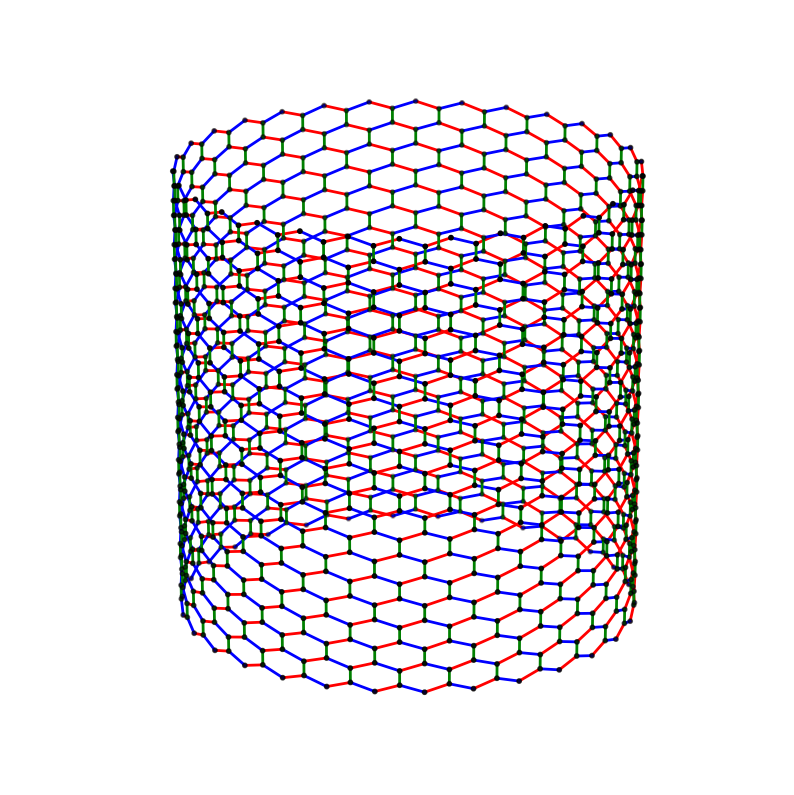

In [742]:
modell = site.SitesPBC(Npx=30, Npy=20)
site.plot_honeycomb_cylinder(modell, make_gif = True, gif_filename = "cylinderatuttotondo.gif", plot_anyon_bonds = False, indices = None)

### Fermionic representation of many wonderful things

In [574]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [575]:
model = site.SitesPBC(Npx=5, Npy=5)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

60


In [570]:
H0_xmaj = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0)
H0_ymaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0)
H0_zmaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0)

H0_x = fgs.Hamiltonian_dirac(H0_xmaj)
H0_y = fgs.Hamiltonian_dirac(H0_ymaj)
H0_z = fgs.Hamiltonian_dirac(H0_zmaj)

dfx = pd.DataFrame(H0_x)
dfy = pd.DataFrame(H0_y)
dfz = pd.DataFrame(H0_z)

print("Hamiltonian H0_x:\n", dfx.round(2))
print("Hamiltonian H0_y:\n", dfy.round(2))
print("Hamiltonian H0_z:\n", dfz.round(2))

Adding xx bonds with Jxx = 1.0
Adding yy bonds with Jyy = 1.0
Adding zz bonds with Jzz = 1.0
Hamiltonian H0_x:
           0         1         2         3         4         5         6   \
0   0.0-1.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1   0.0+0.0j  0.0-1.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2   0.0+0.0j  0.0+0.0j  0.0-1.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0-1.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0-1.0j  0.0+0.0j  0.0+0.0j   
5   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.5j   
6   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.5j  0.0+0.0j   
7   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.5j   
8   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
9   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.5j  0.0+0.0j   
10  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j

In [571]:
He_xmaj = f.generate_Hamiltonian_Majorana(model, Jxx=1.0, Jyy=0.0, Jzz=0.0, type='Anyon')
He_ymaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=1.0, Jzz=0.0, type='Anyon')
He_zmaj = f.generate_Hamiltonian_Majorana(model, Jxx=0.0, Jyy=0.0, Jzz=1.0, type='Anyon')

He_x = fgs.Hamiltonian_dirac(He_xmaj)
He_y = fgs.Hamiltonian_dirac(He_ymaj)
He_z = fgs.Hamiltonian_dirac(He_zmaj)

# dfex = pd.DataFrame(He_x)
# dfey = pd.DataFrame(He_y)
# dfez = pd.DataFrame(He_z)

# print("Hamiltonian He_x:\n", dfex.round(2))
# print("Hamiltonian He_y:\n", dfey.round(2))
# print("Hamiltonian He_z:\n", dfez.round(2))

Adding xx bonds with Jxx = 1.0
type = Anyon!
Adding yy bonds with Jyy = 1.0
type = Anyon!
Adding zz bonds with Jzz = 1.0
type = Anyon!


In [555]:
#check if elements He[20,21] He[21,22] He[22,23] and transpose are with of opposite sign
#with respect to H0
for i in [20,21,22]:
    print(i)
    print(H0_xmaj[i,i+1], He_xmaj[i,i+1])
    print(H0_xmaj[i+1,i], He_xmaj[i+1,i])
    print()
    print(H0_ymaj[i,i+1], He_ymaj[i,i+1])
    print(H0_ymaj[i+1,i], He_ymaj[i+1,i])
    print()
    print(H0_zmaj[i,i+1], He_zmaj[i,i+1])
    print(H0_zmaj[i+1,i], He_zmaj[i+1,i])
    print()

#WORKS

20
0.5j 0.5j
-0.5j -0.5j

0j 0j
0j 0j

0j 0j
0j 0j

21
0j 0j
0j 0j

-0.5j -0.5j
0.5j 0.5j

0j 0j
0j 0j

22
0.5j 0.5j
-0.5j -0.5j

0j 0j
0j 0j

0j 0j
0j 0j



# Topological Order Parameter

Create the loop around central plaquette

In [580]:
indices = [22,24,33,34,35,36,45,47]
# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(-1.0169918301288974+0j)


Now we time evolve the covariance matrix and then measure the loop again!

## Dirac notation
(wrong for now)

In [543]:
# t = np.pi/12
# fgs.update_corr_matrix(He_x,t)
# fgs.update_corr_matrix(He_y,t)
# fgs.update_corr_matrix(He_z,t)

# fgs.Cov = fgs.corr_to_cov()

# print(fgs.expectation_val_Majorana_string(loop))


(-4.692832934642006+0j)


## Majorana notation
R = e^-(h/8)

In [583]:
t = (1/3.)*np.pi/4.
Rex = expm(-He_xmaj*t/8)
Rey = expm(-He_ymaj*t/8)
Rez = expm(-He_zmaj*t/8)
fgs.update_cov_matrix(Rex)
fgs.update_cov_matrix(Rey)
fgs.update_cov_matrix(Rez)

print(fgs.expectation_val_Majorana_string(loop))

(-1.092179110519589+0j)


In [663]:
R0x = expm(H0_xmaj*t/8)
R0y = expm(H0_ymaj*t/8)
R0z = expm(H0_zmaj*t/8)
fgs.update_cov_matrix(R0x)
fgs.update_cov_matrix(R0y)
fgs.update_cov_matrix(R0z)

print(fgs.expectation_val_Majorana_string(loop))


(-10.534039920894216+0j)


We define $\tilde{U}(T) = exp(2i \frac{T}{3}H_{0x})exp(2i \frac{T}{3}H_{0y})exp(2i \frac{T}{3}H_{0z})$

In [191]:
from scipy.linalg import expm

T = 1.

Utilde = expm(2*1j*T*H0_x/3.)*expm(2*1j*T*H0_y/3.)*expm(2*1j*T*H0_z/3.)

In [192]:
eigvals, eigvecs = np.linalg.eig(Utilde)

In [193]:
print(eigvals)

[2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j
 2.67315964+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j
 0.70463723+0.j 0.70463723+0.j 0.70463723+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 2.94948533+0.j 2.94948533+0.j 2.94948533+0.j
 2.94948533+0.j 2.94948533+0.j 0.77747589+0.j 0.77747589+0.j
 0.77747589+0.j 0.77747589+0.j 0.77747589+0.j 2.67315964+0.j
 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j 2.67315964+0.j]
